In [7]:
import json

# Đường dẫn tới file geojson
geojson_path = 'mnt/data/diaphantinh.geojson'

with open(geojson_path, encoding='utf-8') as f:
    data = json.load(f)

# Lọc ra tỉnh Yên Bái
yen_bai = None
for feature in data['features']:
    if feature['properties']['ten_tinh'].lower() == 'yên bái':
        yen_bai = feature
        break

if yen_bai:
    print("Thông tin tỉnh Yên Bái:")
    print("Properties:", yen_bai['properties'])
    print("Geometry:", yen_bai['geometry'])
else:
    print("Không tìm thấy tỉnh Yên Bái")

Thông tin tỉnh Yên Bái:
Properties: {'gid': 63, 'code': 'AD01', 'ten_tinh': 'Yên Bái'}
Geometry: {'type': 'MultiPolygon', 'coordinates': [[[[104.60799944800004, 22.290967909000067], [104.60905616700008, 22.29089478800006], [104.6112504760001, 22.29090005500005], [104.62520727700007, 22.288842550000076], [104.62795684800003, 22.28757032100006], [104.63061641600008, 22.28570117400004], [104.63419415500007, 22.28272597300007], [104.63721990500005, 22.280772310000074], [104.65892919000002, 22.27442654100011], [104.66103459700005, 22.274345719000088], [104.66213154700004, 22.27494466000008], [104.66277082400009, 22.275542649], [104.66359073899999, 22.277163869000027], [104.66441269900005, 22.277932708000044], [104.66505303700009, 22.278104506000048], [104.66605989900009, 22.278106582000042], [104.66734197400004, 22.277853504000063], [104.66844238800005, 22.27700337300007], [104.67004847800007, 22.275174039000056], [104.67463865600007, 22.269301897000027], [104.67693331000004, 22.26649363600

In [8]:
import json

yen_bai_geojson = {
    "type": "FeatureCollection",
    "features": [yen_bai]
}

with open("yen_bai.geojson", "w", encoding="utf-8") as f:
    json.dump(yen_bai_geojson, f, ensure_ascii=False, indent=2)

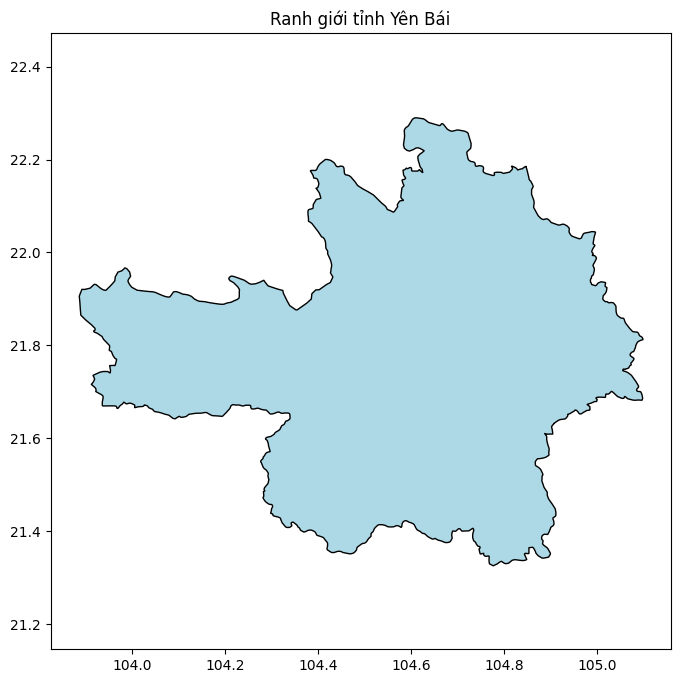

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Đọc file geojson vừa lưu
gdf = gpd.read_file("yen_bai.geojson")

# Vẽ bản đồ
gdf.plot(edgecolor='black', facecolor='lightblue', figsize=(8, 8))
plt.title("Ranh giới tỉnh Yên Bái")
plt.axis('equal')
plt.show()

In [12]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import pandas as pd

# Đọc file geojson Yên Bái
gdf = gpd.read_file("yen_bai.geojson")
gdf_utm = gdf.to_crs(epsg=32648)  # UTM phù hợp miền Bắc VN

# Tạo lưới lớn 10km x 10km
minx, miny, maxx, maxy = gdf_utm.total_bounds
big_size = 10000
big_squares = []
big_ids = []
centers_x = []
centers_y = []

i = 0
for x0 in np.arange(minx, maxx, big_size):
    for y0 in np.arange(miny, maxy, big_size):
        x1, y1 = x0 + big_size, y0 + big_size
        cell = box(x0, y0, x1, y1)
        if cell.intersects(gdf_utm.unary_union):
            big_squares.append(cell)
            big_ids.append(f"big_{i}")
            centers_x.append(cell.centroid.x)
            centers_y.append(cell.centroid.y)
            i += 1

df = pd.DataFrame({
    "big_square_id": big_ids,
    "center_x": centers_x,
    "center_y": centers_y
})
df.to_csv("yen_bai_big_squares_centers.csv", index=False)
print("Đã tạo file yen_bai_big_squares_centers.csv")

Đã tạo file yen_bai_big_squares_centers.csv


C:\Users\PC\AppData\Local\Temp\ipykernel_9292\1802928173.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if cell.intersects(gdf_utm.unary_union):


In [13]:
import geopandas as gpd
from shapely.geometry import box, Point
import numpy as np
import pandas as pd

# Đọc file geojson Yên Bái
gdf = gpd.read_file("yen_bai.geojson")
gdf_utm = gdf.to_crs(epsg=32648)  # UTM phù hợp miền Bắc VN

# Tạo lưới lớn 10km x 10km
minx, miny, maxx, maxy = gdf_utm.total_bounds
big_size = 10000
big_ids = []
centers_utm = []
centers_lon = []
centers_lat = []

i = 0
for x0 in np.arange(minx, maxx, big_size):
    for y0 in np.arange(miny, maxy, big_size):
        x1, y1 = x0 + big_size, y0 + big_size
        cell = box(x0, y0, x1, y1)
        if cell.intersects(gdf_utm.unary_union):
            centroid = cell.centroid
            big_ids.append(f"big_{i}")
            centers_utm.append(centroid)
            i += 1

# Chuyển các điểm trung tâm về WGS84
gdf_centers = gpd.GeoDataFrame({'big_square_id': big_ids, 'geometry': centers_utm}, crs=gdf_utm.crs)
gdf_centers_wgs = gdf_centers.to_crs(epsg=4326)  # WGS84

centers_lon = gdf_centers_wgs.geometry.x
centers_lat = gdf_centers_wgs.geometry.y

df = pd.DataFrame({
    "big_square_id": big_ids,
    "center_lon": centers_lon,
    "center_lat": centers_lat
})
df.to_csv("yen_bai_big_squares_centers_wgs84.csv", index=False)
print("Đã tạo file yen_bai_big_squares_centers_wgs84.csv")

Đã tạo file yen_bai_big_squares_centers_wgs84.csv


C:\Users\PC\AppData\Local\Temp\ipykernel_9292\1190184056.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if cell.intersects(gdf_utm.unary_union):


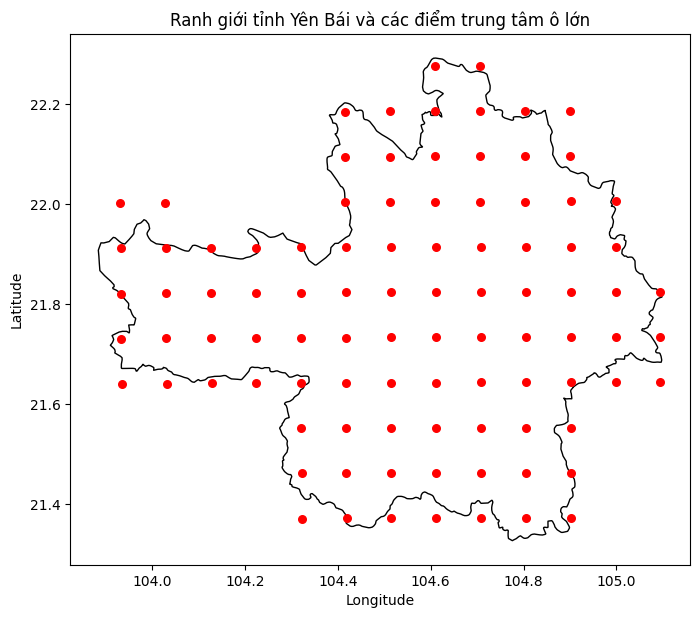

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Đọc ranh giới Yên Bái
gdf = gpd.read_file("yen_bai.geojson")

# Đọc các điểm trung tâm ô lớn (WGS84) từ CSV
df = pd.read_csv("yen_bai_big_squares_centers_wgs84.csv")
centers = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.center_lon, df.center_lat),
    crs="EPSG:4326"
)

# Vẽ bản đồ
fig, ax = plt.subplots(figsize=(8, 8))
gdf.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
centers.plot(ax=ax, color='red', markersize=30)
plt.title("Ranh giới tỉnh Yên Bái và các điểm trung tâm ô lớn")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()